<a href="https://colab.research.google.com/github/amrrahman1/Sales_Pred_ML/blob/main/Sales_Pred_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [380]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading and Exploring data.

In [381]:
# imports :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [382]:
# uploading the work sheet
filename = '/content/drive/MyDrive/Coding Dojo/sales_predictions.csv'

sales_predictions = pd.read_csv(filename)

In [383]:
# verifying data
sales_predictions.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [384]:
#1) How many rows and columns?
sales_predictions.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0              FDA15        9.300  ...  Supermarket Type1          3735.1380
1              DRC01        5.920  ...  Supermarket Type2           443.4228
2              FDN15       17.500  ...  Supermarket Type1          2097.2700
3              FDX07       19.200  ...      Grocery Store           732.3800
4              NCD19        8.930  ...  Supermarket Type1           994.7052
...              ...          ...  ...                ...                ...
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834
8519           FDS36        8.380  ...  Supermarket Type1           549.2850
8520           NCJ29       10.600  ...  Supermarket Type1          1193.1136
8521           FDN46        7.210  ...  Supermarket Type2          1845.5976
8522           DRG01       14.800  ...  Supermarket Type1           765.6700

[8523 rows x 12 columns]>

In [385]:
# 2) What are the datatypes of each variable?
sales_predictions.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Data Cleaning 

In [386]:
## 3) Are there duplicates? If so, drop any duplicates.
# check for Duplicates :
sales_predictions.duplicated().any()

False

In [387]:
#4) Identify missing values.
sales_predictions.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [388]:
#7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
sales_predictions[	"Item_Fat_Content"	].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [389]:
# fixing LF, low fat and reg
sales_predictions["Item_Fat_Content"]= sales_predictions["Item_Fat_Content"].replace('reg', "Regular")
sales_predictions["Item_Fat_Content"]= sales_predictions["Item_Fat_Content"].replace('LF', "Low Fat")
sales_predictions["Item_Fat_Content"]= sales_predictions["Item_Fat_Content"].replace('low fat',"Low Fat")


In [390]:
sales_predictions[	"Item_Fat_Content"	].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [391]:
# Getting the statistical values for the data set
sales_predictions.describe().round()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.0,8523.0,8523.0,8523.0,8523.0
mean,13.0,0.0,141.0,1998.0,2181.0
std,5.0,0.0,62.0,8.0,1706.0
min,5.0,0.0,31.0,1985.0,33.0
25%,9.0,0.0,94.0,1987.0,834.0
50%,13.0,0.0,143.0,1999.0,1794.0
75%,17.0,0.0,186.0,2004.0,3101.0
max,21.0,0.0,267.0,2009.0,13087.0


# Data Visualization

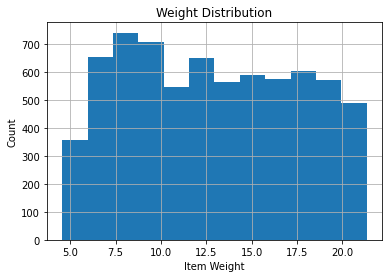

Weight per item tends to fall arount 10 and 15


In [392]:
# Histogram to view the distributions of various features in your dataset.
sales_predictions['Item_Weight'].hist(bins=12)
plt.xlabel('Item Weight')
plt.ylabel('Count')
plt.title('Weight Distribution')

plt.show();
print('Weight per item tends to fall arount 10 and 15')

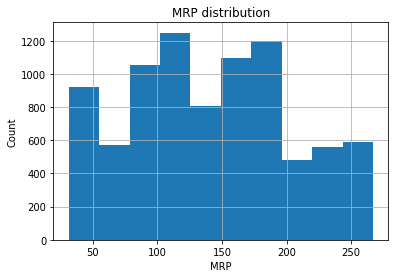

MRP per item tends to fall arount 150


In [393]:
sales_predictions['Item_MRP'].hist(bins=10);
plt.xlabel('MRP')
plt.ylabel('Count')
plt.title('MRP distribution')
plt.show();
print ('MRP per item tends to fall arount 150')

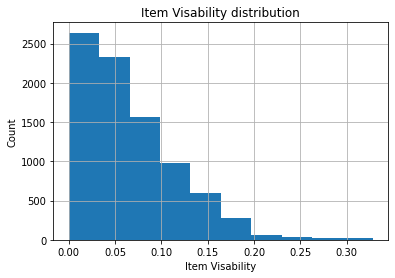

In [394]:
sales_predictions['Item_Visibility'].hist();
plt.xlabel('Item Visability')
plt.ylabel('Count')
plt.title('Item Visability distribution')
plt.show();


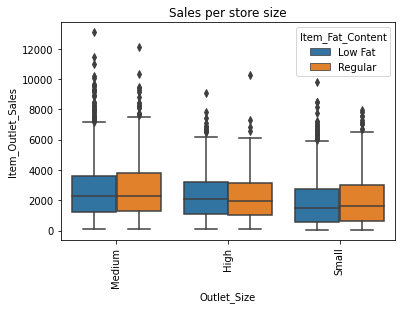

In [395]:
## Boxplot to view statistical summaries of various features in your dataset.
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', hue= 'Item_Fat_Content', data=sales_predictions);
plt.title(label="Sales per store size");
plt.xticks(rotation= 90);

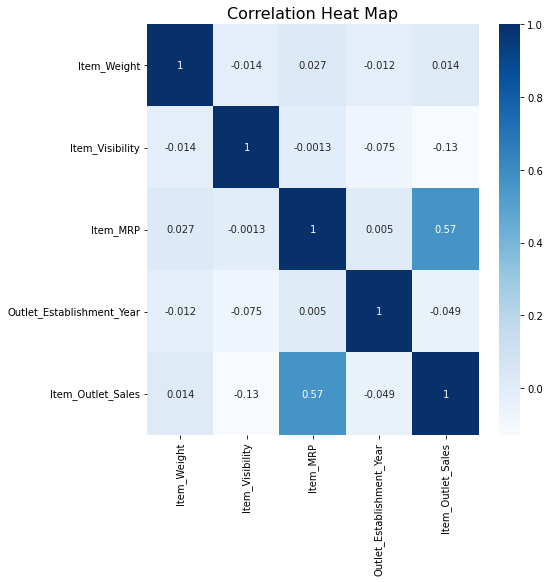

In [396]:
# Heatmap of the correlation between features.
plt.figure(figsize=(8,8))
sns.heatmap(sales_predictions.corr(), cmap='Blues', annot=True);
plt.tight_layout()
plt.title('Correlation Heat Map', fontsize= 16 );


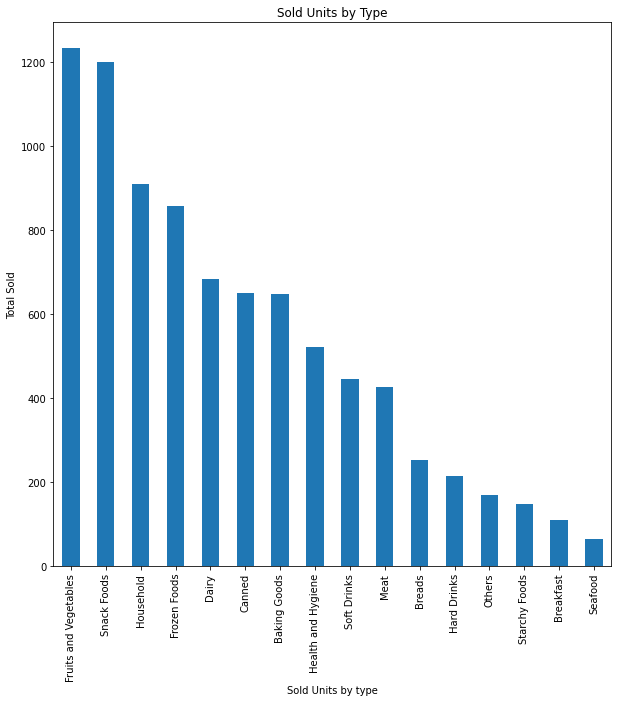

Top sold items are Fruits and vegetables


In [397]:
## This Bar shows the Sold units by Type, this can trigger a management decision to increase the volume of some itesm or remove some itesm froim the shelf.
sold_catgeories = sales_predictions['Item_Type'].value_counts()

sold_catgeories.plot(kind = 'bar', figsize = (10,10))
                 
plt.xlabel('Sold Units by type')
plt.ylabel('Total Sold')
plt.title('Sold Units by Type')

plt.show()

print('Top sold items are Fruits and vegetables')

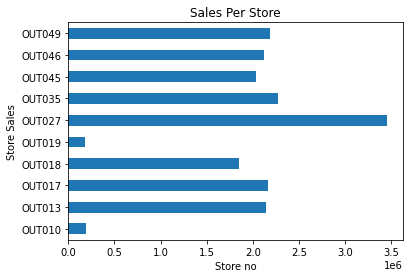

outlet 27 has the most number of sales


In [398]:
sales.plot(kind = 'barh')
plt.xlabel('Store no')
plt.ylabel('Store Sales')
plt.title('Sales Per Store')                 
plt.show()

print ('outlet 27 has the most number of sales')

# Pre-Processing Data

In [399]:
# Dropped Item_Identfier per Josh's suggestion.
sales_predictions = sales_predictions.drop(columns = 'Item_Identifier')

In [400]:
# Identify the target (X) and features (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.  
X = sales_predictions.drop(columns = 'Item_Outlet_Sales')
y = sales_predictions['Item_Outlet_Sales']

#Perform a train test split 
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state =42)

In [401]:
# Selecting cat and num columns
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [402]:
sales_predictions_num = sales_predictions[num_selector]
sales_predictions_num.loc[:, sales_predictions_num.isna().any()]

,Item_Weight
0,9.300
1,5.920
2,17.500
3,19.200
4,8.930
...,...
8518,6.865
8519,8.380
8520,10.600
8521,7.210


In [403]:
# Choosing median to fill in the missing data for the Item_weight column
median_imputer = SimpleImputer(strategy='median')

# Fitting the mean imputer on the X train
median_imputer.fit(X_train[num_selector])

SimpleImputer(strategy='median')

In [404]:
#transforming the numeric columns of both the training and testing sets.
X_train.loc[:, num_selector] = median_imputer.transform(X_train[num_selector])
X_test.loc[:, num_selector] = median_imputer.transform(X_test[num_selector])

In [405]:
# using the Frequant imputer on the catagory data to fill missing value.
freq_imputer = SimpleImputer(strategy='most_frequent')

# Fitting on X train.
freq_imputer.fit(X_train[cat_selector])

SimpleImputer(strategy='most_frequent')

In [406]:
# Transforming both the Xtrain and X test sets.
X_train.loc[:, cat_selector] = freq_imputer.transform(X_train[cat_selector])
X_test.loc[:, cat_selector] = freq_imputer.transform(X_test[cat_selector])

In [407]:
# Making sure there is no missing values
print(X_train.isna().sum().sum(), 'missing values')
X_train.info()

0 missing values
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                6392 non-null   float64
 1   Item_Fat_Content           6392 non-null   object 
 2   Item_Visibility            6392 non-null   float64
 3   Item_Type                  6392 non-null   object 
 4   Item_MRP                   6392 non-null   float64
 5   Outlet_Identifier          6392 non-null   object 
 6   Outlet_Establishment_Year  6392 non-null   float64
 7   Outlet_Size                6392 non-null   object 
 8   Outlet_Location_Type       6392 non-null   object 
 9   Outlet_Type                6392 non-null   object 
dtypes: float64(4), object(6)
memory usage: 549.3+ KB


In [408]:
# Instintiate the OHE
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()

In [409]:
#Transforming data columns to numeric
ohe_tuple = (encoder, cat_selector)
num_tuple = (scaler, num_selector)
column_trans = make_column_transformer(num_tuple,ohe_tuple,remainder='passthrough')

#Modeling and Evaluation

#### Linear Regression Model

In [410]:
# Fitting the model on the training set.
lin_reg = LinearRegression()
pipe = make_pipeline(column_trans,lin_reg)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff560235390>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff560235a50>)])),
                ('linearregression', LinearRegression())])

In [411]:
def evaluate_model(y_true, y_pred):
  
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  r2 = r2_score(y_true, y_pred)

  print(f'scores: MAE: {mae}, \nMSE: {mse}, \nRMSE: {rmse}, \
  \nR2: {r2}')

In [412]:
# Evaluating the training and testing data
print('Training Scores')
evaluate_model(y_train, pipe.predict(X_train))

print('\n')

print('Testing Scores')
evaluate_model(y_test, pipe.predict(X_test))

Training Scores
scores: MAE: 847.124489048811, 
MSE: 1297558.6265037165, 
RMSE: 1139.1043088776885,   
R2: 0.5615549763022067


Testing Scores
scores: MAE: 804.0917231346784, 
MSE: 1194328.3144282238, 
RMSE: 1092.8532904412302,   
R2: 0.5671119440864637


## Linear Regression Model Evaluation :
### r2 scores shows that the Linear regression model is a well fitted model with low score.
### The RMSE scores are high and very similar which shows a higher tendency for errors.





#### Decision Tree Regressor Model

In [413]:
# Intiating the deceision tree regressor.
dec_tree = DecisionTreeRegressor(random_state = 42)

In [414]:
# Fitting the model on the training data
pipe_tree = make_pipeline(column_trans, dec_tree)
pipe_tree.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff560235390>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff560235a50>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [416]:
# Evaluating the Model.
# Evaluating the training and testing data
print('Training Scores')
evaluate_model(y_train, pipe_tree.predict(X_train))

print('\n')

print('Testing Scores')
evaluate_model(y_test, pipe_tree.predict(X_test))

Training Scores
scores: MAE: 0.0, 
MSE: 0.0, 
RMSE: 0.0,   
R2: 1.0


Testing Scores
scores: MAE: 1053.2196781792586, 
MSE: 2274125.2268458675, 
RMSE: 1508.020300541696,   
R2: 0.17573615524259611


###R2 was high on the training set and low on the test set which means that this model has a high variance meaning that the model is over fitted.

### RMSE was zero on the training set and much higher on the testing set 